### Helper Functions

In [1]:
import tensorflow as tf
tf.__version__

'2.9.0'

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
!nvidia-smi

Sun Apr  7 01:31:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.34                 Driver Version: 537.34       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8              12W / 130W |   4536MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# Import helper functions we're going to use in this notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [5]:
# Check out how many images and directories are there in our dataset
walk_through_dir("D:\DeepLearningModels\IoT_Plant_Care\dataset")

There are 4 directories and 0 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset'.
There are 1 directories and 0 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset\New Plant Diseases Dataset(Augmented)'.
There are 0 directories and 0 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)'.
There are 1 directories and 0 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset\test'.
There are 0 directories and 33 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset\test\test'.
There are 38 directories and 0 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset\train'.
There are 0 directories and 2016 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset\train\Apple___Apple_scab'.
There are 0 directories and 1987 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset\train\Apple___Black_rot'.
There are 0 directories and 1760 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset\train\Apple___C

### Creating 10% data

In [5]:
# Create training and test directory paths
train_dir = "D:/DeepLearningModels/IoT_Plant_Care/dataset/train"
valid_dir = "D:/DeepLearningModels/IoT_Plant_Care/dataset/valid"
test_dir = "D:/DeepLearningModels/IoT_Plant_Care/dataset/test"
train_dir_10_percent = "D:/DeepLearningModels/IoT_Plant_Care/dataset_10_percent/train"

In [8]:
import os
import shutil
import random

# Define directories
train_dir = "D:/DeepLearningModels/IoT_Plant_Care/dataset/train"
new_dir = "D:/DeepLearningModels/IoT_Plant_Care/dataset_10_percent"

# Create new directory if it doesn't exist
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

# Function to select 10% of files from each class
def select_10_percent(src_dir, dst_dir):
    # List all subdirectories (classes)
    classes = os.listdir(src_dir)
    
    for class_name in classes:
        class_dir = os.path.join(src_dir, class_name)
        files = os.listdir(class_dir)
        
        # Randomly select 10% of files
        selected_files = random.sample(files, k=int(0.1 * len(files)))
        
        # Create destination directory for this class
        dst_class_dir = os.path.join(dst_dir, class_name)
        if not os.path.exists(dst_class_dir):
            os.makedirs(dst_class_dir)
        
        # Copy selected files to destination directory
        for file_name in selected_files:
            src_file = os.path.join(class_dir, file_name)
            dst_file = os.path.join(dst_class_dir, file_name)
            shutil.copy(src_file, dst_file)

# Call the function for train directory
select_10_percent(train_dir, new_dir)


In [7]:
# Check out how many images and directories are there in our dataset
walk_through_dir("D:\DeepLearningModels\IoT_Plant_Care\dataset_10_percent")

There are 1 directories and 0 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset_10_percent'.
There are 38 directories and 0 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset_10_percent\train'.
There are 0 directories and 201 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset_10_percent\train\Apple___Apple_scab'.
There are 0 directories and 198 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset_10_percent\train\Apple___Black_rot'.
There are 0 directories and 176 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset_10_percent\train\Apple___Cedar_apple_rust'.
There are 0 directories and 200 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset_10_percent\train\Apple___healthy'.
There are 0 directories and 181 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset_10_percent\train\Blueberry___healthy'.
There are 0 directories and 182 images in 'D:\DeepLearningModels\IoT_Plant_Care\dataset_10_percent\train\Cherry_(including_sour)___healthy'.
There are 0 directori

In [8]:
import tensorflow as tf

In [8]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

valid_data = tf.keras.preprocessing.image_dataset_from_directory(directory=valid_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 7013 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [10]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [11]:
# Check out class names of out dataset
train_data_10_percent.class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [12]:
# See an example of a batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[162.14287   150.14287   150.14287  ]
   [157.11736   145.11736   145.11736  ]
   [171.66837   159.66837   159.66837  ]
   ...
   [163.17365   149.17365   149.17365  ]
   [177.5409    163.5409    163.5409   ]
   [181.71942   167.71942   167.71942  ]]

  [[162.64796   150.64796   150.64796  ]
   [171.14796   159.14796   159.14796  ]
   [182.15306   170.15306   170.15306  ]
   ...
   [167.97958   153.97958   153.97958  ]
   [167.2551    153.2551    153.2551   ]
   [166.40816   152.40816   152.40816  ]]

  [[174.17856   162.17856   162.17856  ]
   [182.81123   170.81123   170.81123  ]
   [185.68877   173.68877   173.68877  ]
   ...
   [173.69907   159.69907   159.69907  ]
   [175.24998   161.24998   161.24998  ]
   [166.77025   152.77025   152.77025  ]]

  ...

  [[185.75508   175.75508   174.75508  ]
   [183.80121   173.80121   172.80121  ]
   [181.61241   171.61241   170.61241  ]
   ...
   [182.17874   170.17874   174.17874  ]
   [188.62769   176.62769   180.62769  ]
   [1

### Base Model 0: Building a transfer learning model using the Keras Functional API

In [13]:
num_classes = len(train_data_10_percent.class_names)
num_classes

38

In [14]:
# 1. Create a base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model 
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If you're using ResNet50V2 you will need to normalize inputs (you dont have to for EfficientNet they have built in rescaling)
#x = tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255)(inputs)

# 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(num_classes, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)



Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)


In [15]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 38)                48678     
                                                                 
Total params: 4,098,249
Trainable params: 48,678
Non-trainable params: 4,049,571
_________________________________________________________________


In [16]:
# 9. Compile the model
model_0.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [17]:
# 10. Fit the model
history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="10_percent_feature_extraction")]) 

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20240406-230930
Epoch 1/5
220/220 [==============================] - 29s 95ms/step - loss: 1.4796 - accuracy: 0.7140 - val_loss: 0.6641 - val_accuracy: 0.8809
Epoch 2/5
220/220 [==============================] - 19s 88ms/step - loss: 0.5112 - accuracy: 0.9049 - val_loss: 0.4031 - val_accuracy: 0.9174
Epoch 3/5
220/220 [==============================] - 20s 89ms/step - loss: 0.3404 - accuracy: 0.9371 - val_loss: 0.3154 - val_accuracy: 0.9302
Epoch 4/5
220/220 [==============================] - 20s 89ms/step - loss: 0.2574 - accuracy: 0.9504 - val_loss: 0.2618 - val_accuracy: 0.9398
Epoch 5/5
220/220 [==============================] - 20s 89ms/step - loss: 0.2089 - accuracy: 0.9605 - val_loss: 0.2286 - val_accuracy: 0.9482


In [21]:
model_0.save('models/base_model_h5.h5', save_format='h5')

In [22]:
model_0.save('models/base_model')

INFO:tensorflow:Assets written to: models/base_model\assets


INFO:tensorflow:Assets written to: models/base_model\assets


In [25]:
# Path to your saved model (replace with your actual path)
model_path = 'models/base_model_h5.h5'

# Load the model
loaded_model = tf.keras.models.load_model(model_path)

In [28]:
loaded_model.evaluate(test_data)

550/550 [==============================] - 32s 56ms/step - loss: 0.2365 - accuracy: 0.9446


[0.23645277321338654, 0.9445708990097046]

In [26]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

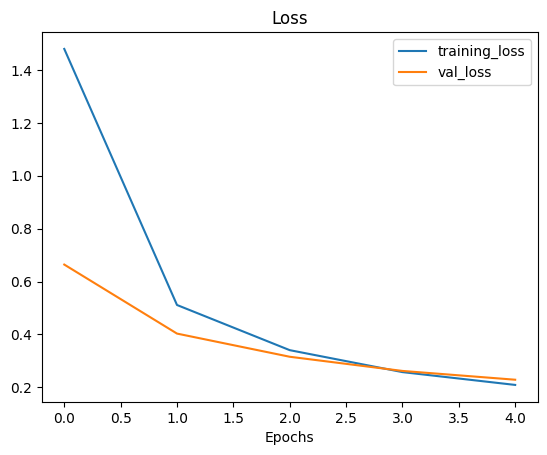

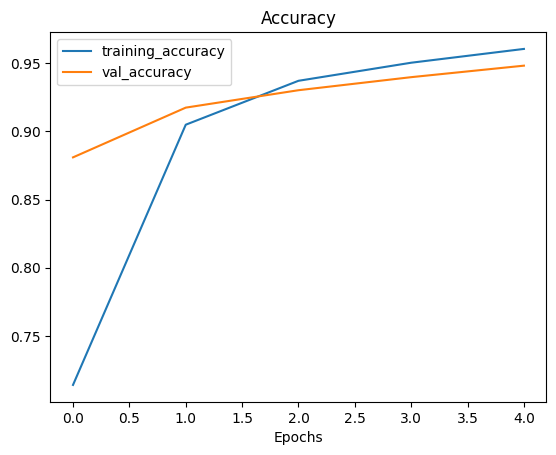

In [29]:
# Check out our model's training curves
plot_loss_curves(history_0)

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmentation stage with horizontal flipping, rotations, zooms, etc.
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.9),
    preprocessing.RandomZoom(0.9),
    preprocessing.RandomHeight(1),
    preprocessing.RandomWidth(0.9),
    #preprocessing.Rescaling(1/255.)   # Keep for modelslike ResNet50V2 but EfficientNet's having rescaling built-in
], name = "data_augmentation")

Visualize our augmented layer

(-0.5, 255.5, 255.5, -0.5)

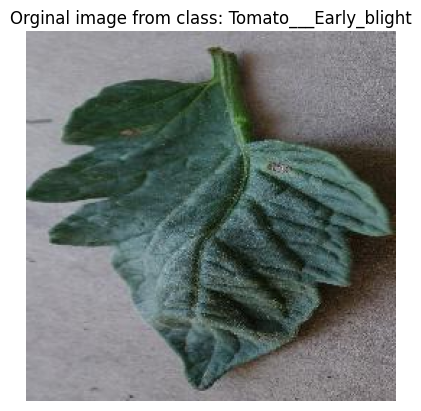

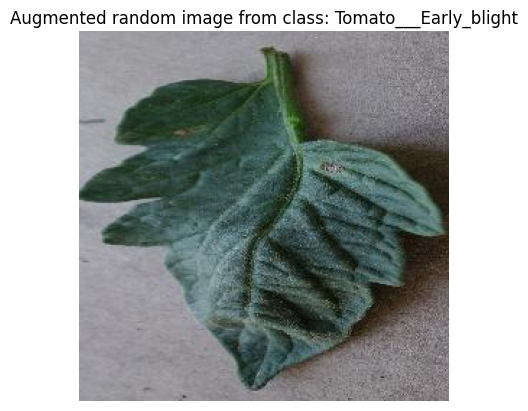

In [35]:
#from keras.src.engine.sequential import training
# View a random image and compare it to it's augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_10_percent.class_names)
target_dir = "D:/DeepLearningModels/IoT_Plant_Care/dataset_10_percent/train/"+target_class

random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir+"/"+random_image

# Read in the random image
img = mpimg.imread(random_image_path)

plt.imshow(img)
plt.title(f"Orginal image from class: {target_class}")
plt.axis(False)

# Now let's plot our augmented random image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False)

Fine Tuning Model 0

In [37]:
# Layers in loaded model
model_0.layers

In [38]:
# Are these layers trainable?
for layer in model_0.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001DDF4AFAE00> True
<keras.engine.functional.Functional object at 0x000001DEF8B2E680> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x000001DDE93B3FD0> True
<keras.layers.core.dense.Dense object at 0x000001DEF8B2E920> True


In [39]:
# Layers in our base model(EfficientNetB0) and are they trainable?
for i, layer in enumerate(model_0.layers[1].layers):
  print(i, layer, layer.name, layer.trainable)

0 <keras.engine.input_layer.InputLayer object at 0x000001DDF4AFB7F0> input_1 False
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x000001DDF5DD5210> rescaling False
2 <keras.layers.preprocessing.normalization.Normalization object at 0x000001DDF5DD45B0> normalization False
3 <keras.layers.core.tf_op_layer.TFOpLambda object at 0x000001DDF5DD5720> tf.math.truediv False
4 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x000001DDA50F6290> stem_conv_pad False
5 <keras.layers.convolutional.conv2d.Conv2D object at 0x000001DDF5DD6710> stem_conv False
6 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001DDF5DD6C50> stem_bn False
7 <keras.layers.core.activation.Activation object at 0x000001DDF5DD5930> stem_activation False
8 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x000001DDF5DD7E50> block1a_dwconv False
9 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001DDF

In [40]:
# How many trainable variables are there in our base model?
print(len(model_0.layers[2].trainable_variables))

0


In [41]:
# To begin fine-tuning, let's start by setting the last 10 layers of our base_model.trainable = True
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [42]:
# Check which layers are tunable (trainable)
for layer_number, layer in enumerate(model_0.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 tf.math.truediv False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [43]:
# Recompile (we have to recompile our models every time we make a change)
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # When fine tuning you typically wanna lower the learning rate by 10x
                metrics=["accuracy"])

In [44]:
# Now we've unfrozen some of the layers closer to the top, how many trainable variables are there
print(len(model_0.trainable_variables))

12


In [45]:
initial_epochs = 5

# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_tuned_2 = model_0.fit(train_data_10_percent,
                                   epochs=fine_tune_epochs,
                                   validation_data=test_data,
                                   validation_steps=int(0.25*len(test_data)),
                                   initial_epoch=history_0.epoch[-1], # Start training from previous last epoch,
                                   callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                          experiment_name="10_percent_fine_tuned_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tuned_last_10/20240406-231824
Epoch 5/10
220/220 [==============================] - 26s 95ms/step - loss: 0.1812 - accuracy: 0.9614 - val_loss: 0.1567 - val_accuracy: 0.9557
Epoch 6/10
220/220 [==============================] - 20s 89ms/step - loss: 0.1124 - accuracy: 0.9768 - val_loss: 0.1372 - val_accuracy: 0.9605
Epoch 7/10
220/220 [==============================] - 20s 90ms/step - loss: 0.0851 - accuracy: 0.9842 - val_loss: 0.1192 - val_accuracy: 0.9640
Epoch 8/10
220/220 [==============================] - 20s 90ms/step - loss: 0.0672 - accuracy: 0.9876 - val_loss: 0.1098 - val_accuracy: 0.9672
Epoch 9/10
220/220 [==============================] - 20s 90ms/step - loss: 0.0513 - accuracy: 0.9927 - val_loss: 0.1022 - val_accuracy: 0.9681
Epoch 10/10
220/220 [==============================] - 20s 91ms/step - loss: 0.0409 - accuracy: 0.9949 - val_loss: 0.0996 - val_accuracy: 0.9701


In [46]:
# Evaluate the fine-tuned model (model_3 which is actually model_2 fine-tuned for another 5 epochs)
results_fine_tuned_10_percent = model_0.evaluate(valid_data)

550/550 [==============================] - 31s 55ms/step - loss: 0.1026 - accuracy: 0.9687


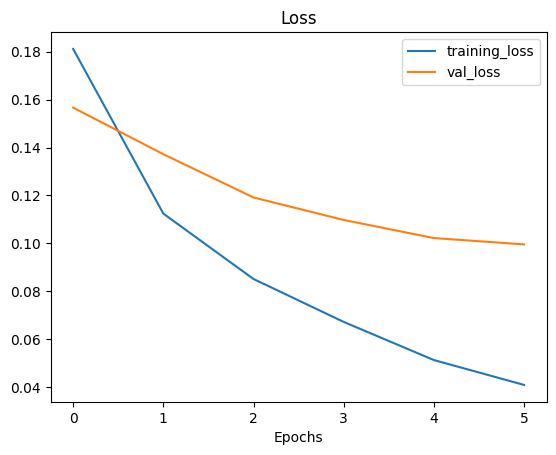

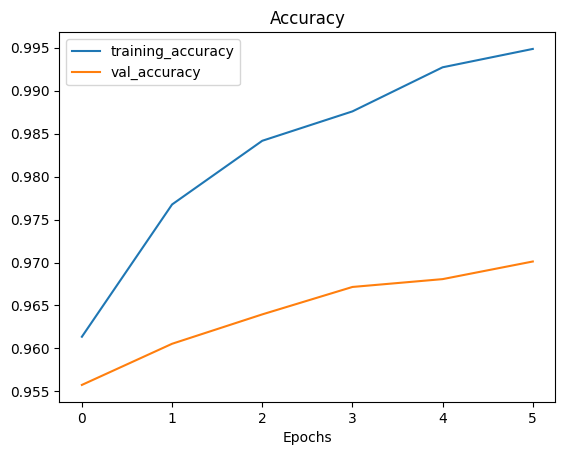

In [47]:
# Check out the loss curves of the fine-tuned model
plot_loss_curves(history_fine_tuned_2)

In [49]:
# Creating a function to compare training histories
def compare_histories(original_history, new_history, initial_epochs=5):
  """
  Compares two Tensorflow History Objects.
  """
  # Get original history measurements]
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history metrics with new history metrics
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]
  # Make plots (accuracy)
  plt.figure(figsize=(8,8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Validation Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.suptitle("Training and Validation Accuracy")
  plt.title("Plant disease detection")

  # Make plots (loss)
  plt.figure(figsize=(8,8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Validation Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")
  # Add a title for the entire comparison
  

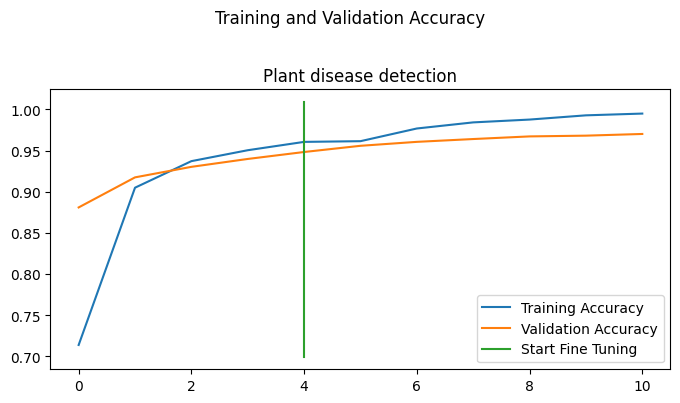

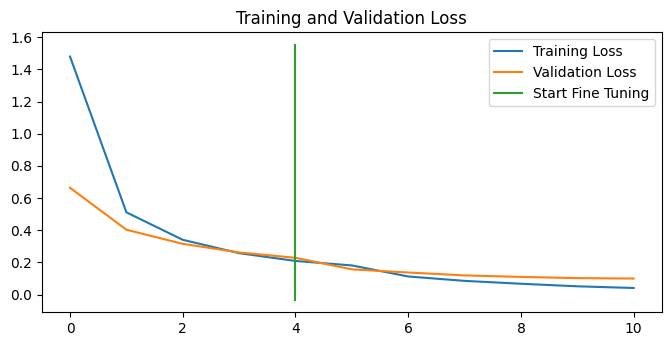

In [50]:
compare_histories(history_0, history_fine_tuned_2, initial_epochs=5)

In [53]:
model_0.save('models/10_percent_fine_tuned_h5.h5', save_format='h5')

In [54]:
model_0.save('models/10_percent_fine_tuned')

INFO:tensorflow:Assets written to: models/10_percent_fine_tuned\assets


INFO:tensorflow:Assets written to: models/10_percent_fine_tuned\assets


### Run this in terminal to check training logs

tensorboard --logdir=D:/DeepLearningModels/IoT_Plant_Care/transfer_learning

### Saving the trained model_0

## Testing the model

In [22]:
valid_data = tf.keras.preprocessing.image_dataset_from_directory(valid_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False) # don't shuffle test data for prediction analysis

Found 17572 files belonging to 38 classes.


In [9]:
# Path to your saved model (replace with your actual path)
model_path = 'models/base_model_h5.h5'

# Load the model
loaded_model = tf.keras.models.load_model(model_path)

In [23]:
# Evaluate on the whole test dataset
feature_extraction_results = loaded_model.evaluate(valid_data)
feature_extraction_results

550/550 [==============================] - 30s 55ms/step - loss: 0.2365 - accuracy: 0.9446


[0.23645275831222534, 0.9445708990097046]

In [24]:
# Make predictions with our model
preds_probs = loaded_model.predict(valid_data, verbose=1) # Set verbosity to see how long is left

  1/550 [..............................] - ETA: 26s

550/550 [==============================] - 29s 53ms/step


In [25]:
# How many predictions are there?
len(preds_probs)

17572

In [26]:
# What's the shape of our predictions?
preds_probs.shape

(17572, 38)

In [27]:
# We get one prediction probability per class (in our case there's 101 prediction probabilities)
print(f"Number of prediction peobabilities for sample 0: {len(preds_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {preds_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {preds_probs[0].argmax()}")

Number of prediction peobabilities for sample 0: 38
What prediction probability sample 0 looks like:
 [9.73189771e-01 1.01629721e-05 4.74832905e-03 2.89000012e-03
 8.39939865e-04 8.39928180e-05 1.08118466e-05 2.84845519e-05
 5.05614153e-05 5.89331721e-05 1.21351506e-04 1.44421603e-04
 1.49862826e-04 8.51251418e-04 1.71240477e-03 2.35818106e-06
 5.35340878e-05 4.29968804e-06 2.45806996e-06 1.36714254e-06
 4.78572147e-05 6.81646343e-04 1.31949739e-04 1.47841906e-03
 1.30082801e-04 3.31324176e-04 1.76098570e-03 1.28178170e-03
 8.52102181e-04 1.94856999e-04 6.89165259e-04 1.22955733e-03
 3.94912582e-04 1.49925158e-03 3.01107019e-03 2.36468506e-04
 3.05711699e-04 7.88473175e-04]
The class with the highest predicted probability by the model for sample 0: 0


In [28]:
valid_data.class_names[0]

'Apple___Apple_scab'

In [29]:
# Get the pred classes of each label
pred_classes = preds_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
# To get our test labels we need to unravel our test_data BatchDataset
y_labels = []
for images, labels in valid_data.unbatch():
  y_labels.append(labels.numpy().argmax())  # Currently test labels look like: [0, 0, 0, 1, .... 0, 0], we want the index value where the "1" occurs
y_labels[:10] # look at the first 10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [31]:
# How many y_labels are there?
len(y_labels)

17572

In [32]:
# Get a list of class names
class_names = valid_data.class_names
class_names[:10]

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight']

In [33]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# We need to make some changes to our make_confusion_matrix function to ensure the x-labels print vertically
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Changed (plot x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [34]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100,100),
                      text_size=20,
                      savefig=True)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       504
           1       0.96      0.99      0.98       497
           2       0.98      0.97      0.98       440
           3       0.95      0.96      0.96       502
           4       0.99      0.99      0.99       454
           5       0.99      0.98      0.98       421
           6       0.99      0.99      0.99       456
           7       0.97      0.86      0.91       410
           8       0.99      1.00      0.99       477
           9       0.90      0.98      0.94       477
          10       1.00      1.00      1.00       465
          11       0.91      0.97      0.94       472
          12       0.98      0.90      0.94       480
          13       0.99      0.99      0.99       430
          14       1.00      0.99      0.99       423
          15       1.00      0.99      1.00       503
          16       0.99      0.97      0.98       459
          17       0.96    

In [36]:
# Get a dictionary of classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.9504950495049505,
  'recall': 0.9523809523809523,
  'f1-score': 0.9514370664023786,
  'support': 504.0},
 '1': {'precision': 0.9629629629629629,
  'recall': 0.993963782696177,
  'f1-score': 0.9782178217821782,
  'support': 497.0},
 '2': {'precision': 0.981651376146789,
  'recall': 0.9727272727272728,
  'f1-score': 0.9771689497716896,
  'support': 440.0},
 '3': {'precision': 0.9489194499017681,
  'recall': 0.9621513944223108,
  'f1-score': 0.9554896142433235,
  'support': 502.0},
 '4': {'precision': 0.986870897155361,
  'recall': 0.9933920704845814,
  'f1-score': 0.9901207464324916,
  'support': 454.0},
 '5': {'precision': 0.9903846153846154,
  'recall': 0.9786223277909739,
  'f1-score': 0.984468339307049,
  'support': 421.0},
 '6': {'precision': 0.9934065934065934,
  'recall': 0.9912280701754386,
  'f1-score': 0.9923161361141604,
  'support': 456.0},
 '7': {'precision': 0.9697802197802198,
  'recall': 0.8609756097560975,
  'f1-score': 0.9121447028423773,
  'suppor

In [37]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report dictionary items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy
    break
  else:
    # Add class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]


class_f1_scores

{'Apple___Apple_scab': 0.9514370664023786,
 'Apple___Black_rot': 0.9782178217821782,
 'Apple___Cedar_apple_rust': 0.9771689497716896,
 'Apple___healthy': 0.9554896142433235,
 'Blueberry___healthy': 0.9901207464324916,
 'Cherry_(including_sour)___Powdery_mildew': 0.984468339307049,
 'Cherry_(including_sour)___healthy': 0.9923161361141604,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0.9121447028423773,
 'Corn_(maize)___Common_rust_': 0.9937238493723849,
 'Corn_(maize)___Northern_Leaf_Blight': 0.9358717434869739,
 'Corn_(maize)___healthy': 0.9978494623655914,
 'Grape___Black_rot': 0.9376915219611849,
 'Grape___Esca_(Black_Measles)': 0.9359391965255157,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 0.9895712630359211,
 'Grape___healthy': 0.9940688018979834,
 'Orange___Haunglongbing_(Citrus_greening)': 0.9950248756218906,
 'Peach___Bacterial_spot': 0.9779735682819384,
 'Peach___healthy': 0.9783352337514254,
 'Pepper,_bell___Bacterial_spot': 0.9583333333333333,
 'Pepper,_bell___h

In [38]:
# Turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)

In [39]:
f1_scores[:10]

class_names  f1-score
10                    Corn_(maize)___healthy  0.997849
25                   Squash___Powdery_mildew  0.997696
23                       Raspberry___healthy  0.996641
15  Orange___Haunglongbing_(Citrus_greening)  0.995025
14                           Grape___healthy  0.994069
8                Corn_(maize)___Common_rust_  0.993724
6          Cherry_(including_sour)___healthy  0.992316
27                      Strawberry___healthy  0.991170
4                        Blueberry___healthy  0.990121
26                  Strawberry___Leaf_scorch  0.989807

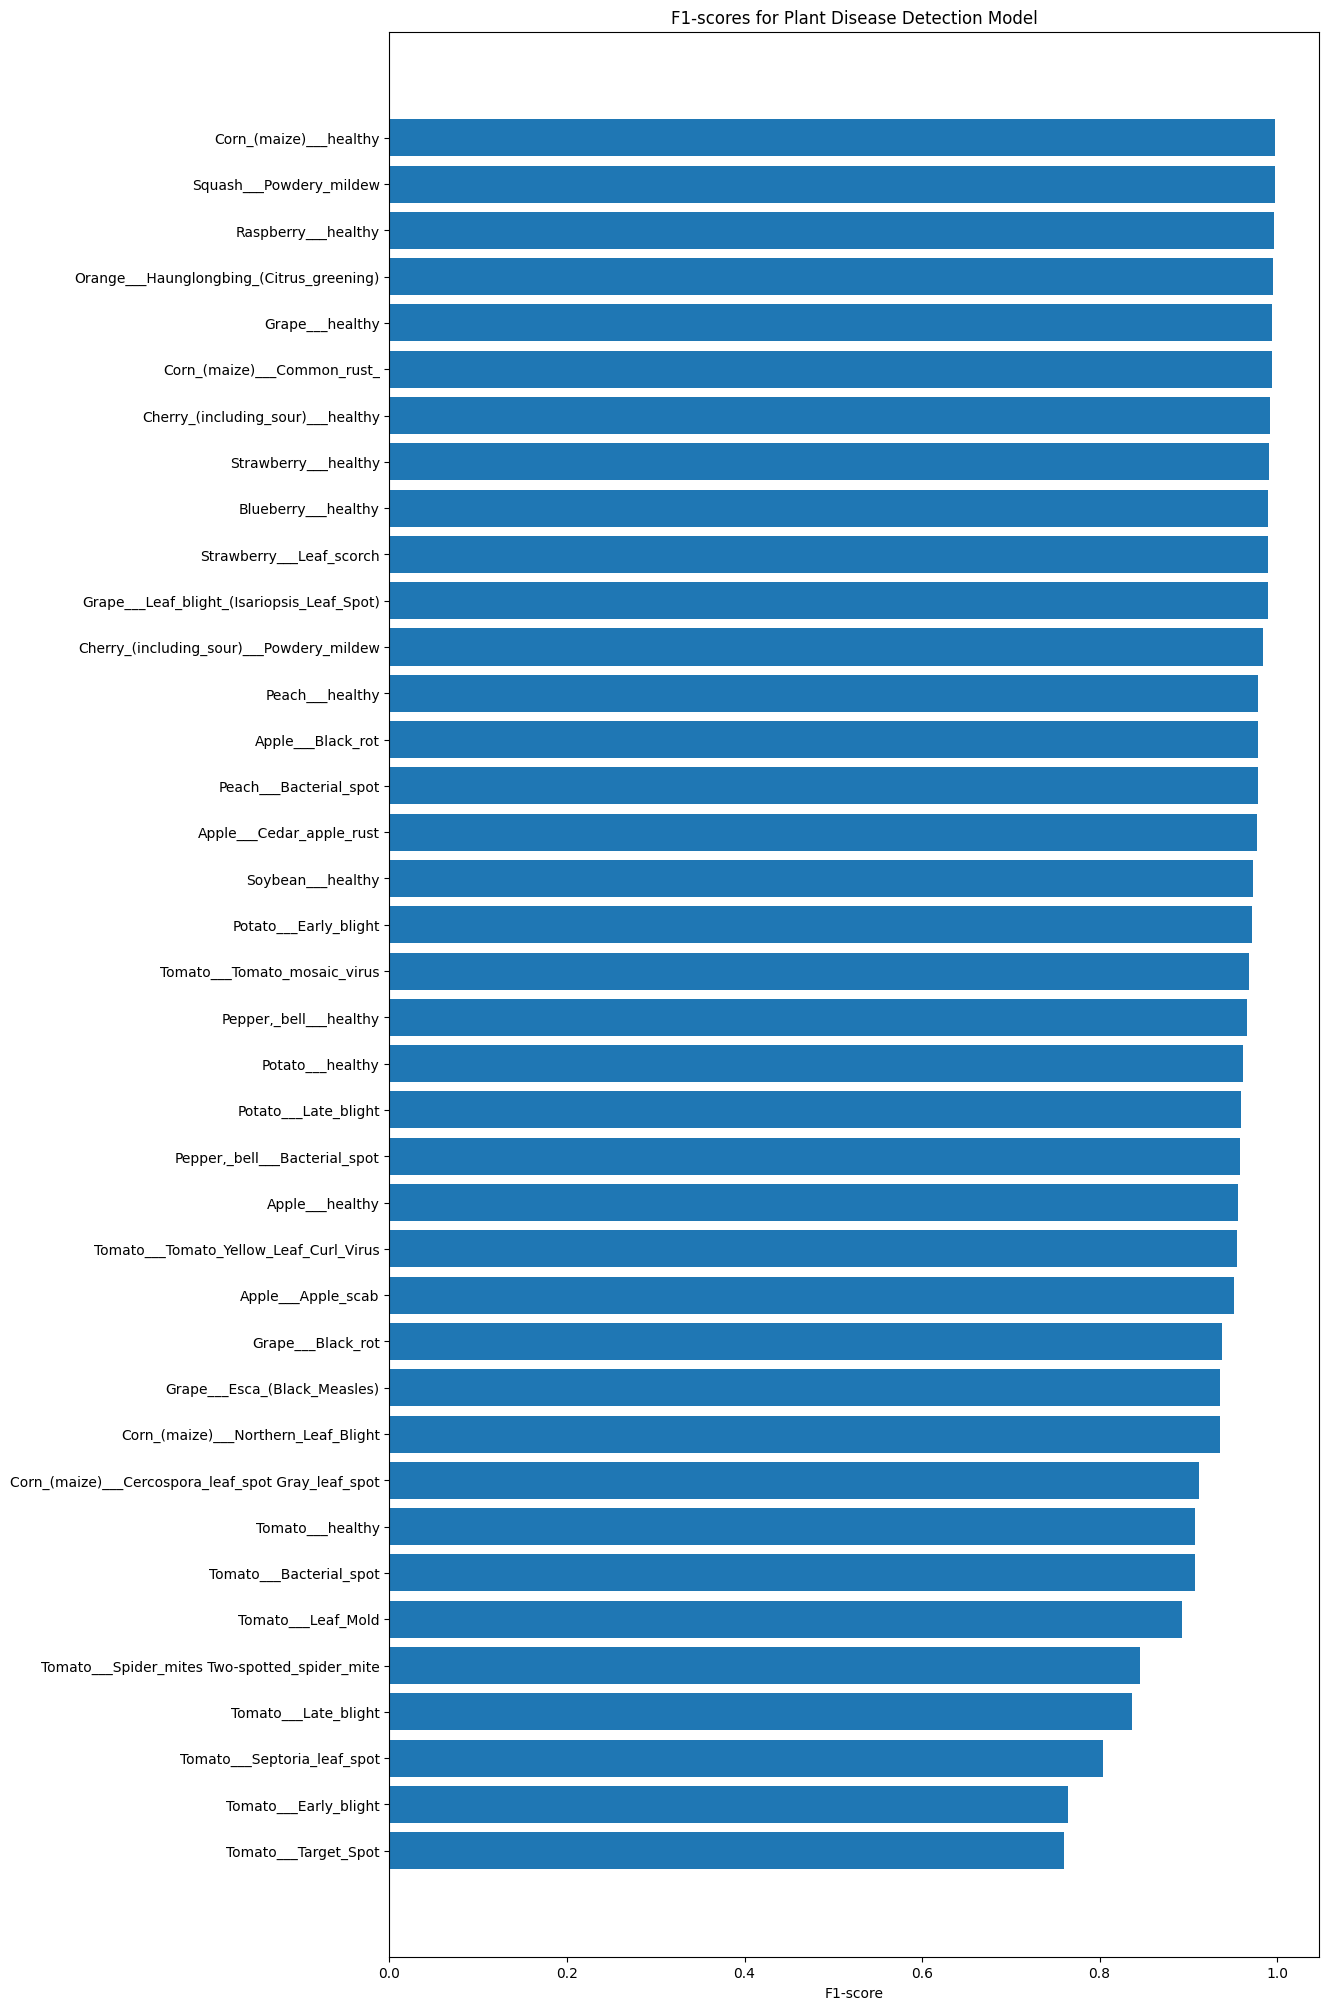

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)  # get f1-score values

ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-score")
ax.set_title("F1-scores for Plant Disease Detection Model")
ax.invert_yaxis();


### Testing on custom data

In [42]:
# Create a function to load and prepare images
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  specified shape (img_shape, img_shape, color_channels=3).

  Args:
    filename (str): path to target image
    img_shape (int): height/width dimension of target image size
    scale (bool): scale pixel values from 0-255 to 0-1 or not.

  Returns:
    Image tensor of shape (img_shape, img_shape, 3)
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3)

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale? yes/no
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.

  else:
    return img # don't need to rescale for EfficicentNet models in Tensorflow

In [57]:
import os
# Get the custom food images file paths
custom_food_images = ["custom_food_images/"+img_path for img_path in os.listdir("custom_food_images")]
custom_food_images

['custom_food_images/20170815a-max-pixel.jpg',
 'custom_food_images/800wm.jpeg',
 'custom_food_images/apple_cedar_rust.jpg',
 'custom_food_images/apple_healthy.JPG',
 'custom_food_images/corn-leaves.jpg',
 'custom_food_images/corn.jpg',
 'custom_food_images/images (1).jpeg',
 'custom_food_images/images.jpeg',
 'custom_food_images/Screenshot 2024-04-07 014900.png',
 'custom_food_images/Screenshot 2024-04-07 015101.png',
 'custom_food_images/strawberry_common_leaf_spot.jpg',
 'custom_food_images/The-three-Sample-leaves-of-potato-are-a-leaf-affected-by-Light-Blight-b-leaf.png']

1/1 [==============================] - 0s 25ms/step


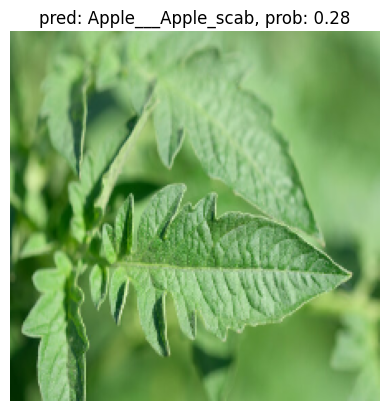

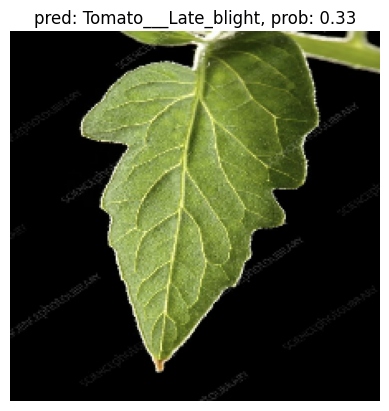

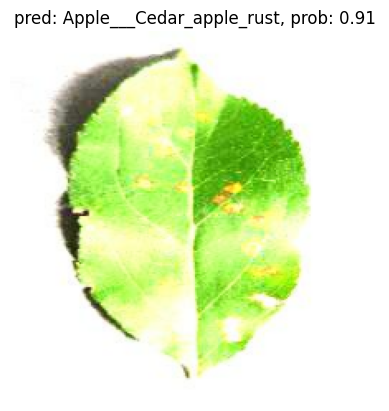

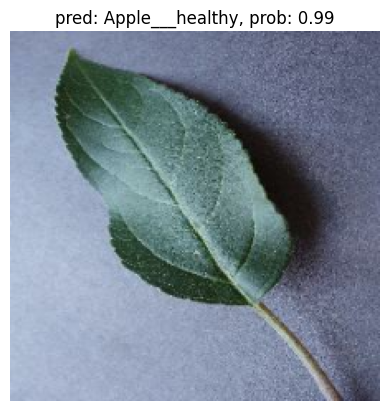

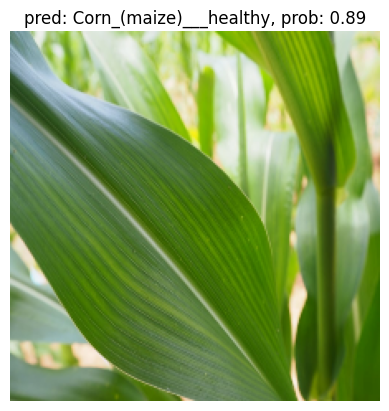

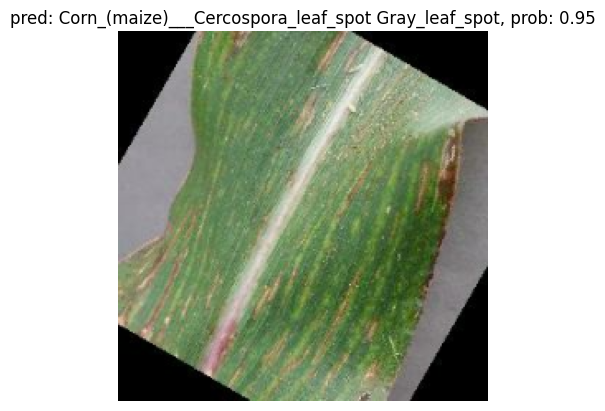

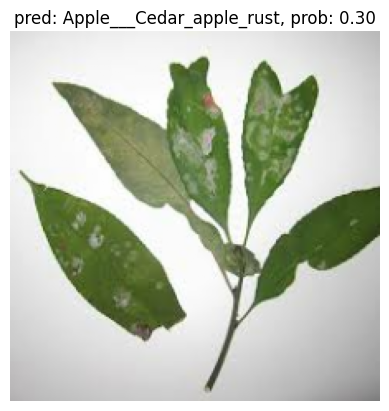

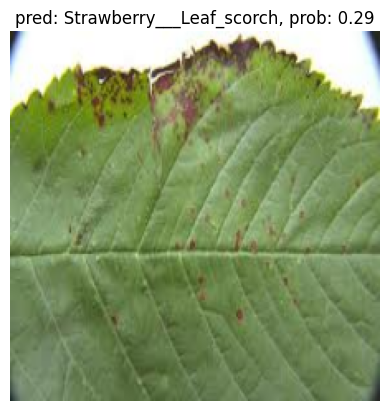

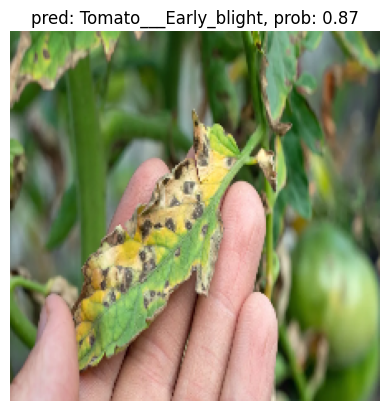

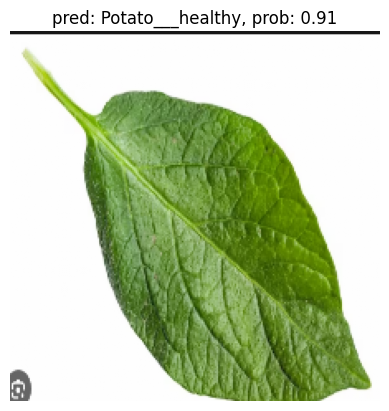

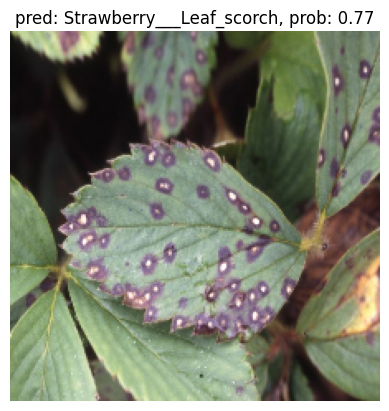

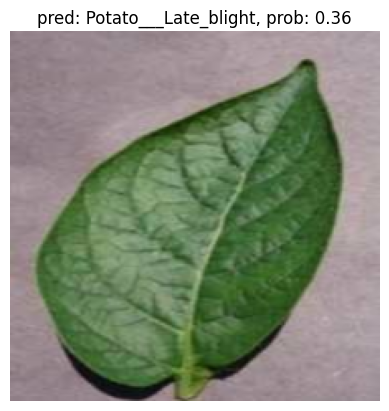

In [58]:
# Make predictions on and plot custom food images
for img in custom_food_images:
  img  = load_and_prep_image(img, scale=False)  # don't need to scale for EfficientNetb0
  pred_prob = loaded_model.predict(tf.expand_dims(img, axis=0))   # make prediction on image with shape [1, 224, 224, 3] (same shape on which our model waas trained on)
  pred_class = class_names[pred_prob.argmax()]  # get the index with the highest prediction probability

  # Plot the appropriate information
  plt.figure()
  plt.imshow(img/255.)
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)